In [40]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [41]:
def clean_index(df):
    new = df.copy()
    # Remove (1), (2) etc. from the index
    new.index = df.index.str.replace(r"\(.*\)", "") 
    # Remove leading and trailing whitespaces
    new.index = new.index.str.strip()
    # Straify upper and lower case 
    new.index = new.index.str.upper()
    return new

def substract_background(df, background_col = "blank"):
    new = df.copy()
    background = new[background_col]
    new = new.drop(columns=[background_col])
    new = new.sub(background, axis=0)
    
    return new

def normalize_by_median(df):
    new = df.copy()
    new = new.div(new.median(axis=1), axis=0)
    return new

In [42]:
# Load myocyte / myotube data
df_soleus = pd.read_csv('../data/soleus_myocyte_pmt_tracing_pools_combined_240731.csv', index_col=0)

# Clean up the infex
df_soleus = clean_index(df_soleus)
df_soleus = substract_background(df_soleus, background_col="Blank_3")
df_soleus = normalize_by_median(df_soleus)

df_soleus.head()

/tmp/ipykernel_28701/2652409694.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new.index = df.index.str.replace(r"\(.*\)", "")


,Control_100ppm_1,Control_100ppm_2,Control_100ppm_3,Control_500ppm_1,Control_500ppm_2,Control_500ppm_3,Insulin_100ppm_1,Insulin_100ppm_2,Insulin_100ppm_3,Insulin_500ppm_1,Insulin_500ppm_2,Insulin_500ppm_3
Compound,,,,,,,,,,,,
PHENYLALANINE,0.951568,0.779587,0.773873,1.242038,0.982675,1.513498,1.017325,0.836384,0.967121,1.179453,1.093475,1.132978
TYROSINE,0.936543,0.733541,0.824054,1.185715,1.020111,1.577031,0.979889,0.794650,0.822343,1.137623,1.049031,1.108439
TRYPTOPHAN,0.874775,0.639995,0.692975,0.911795,0.813080,1.332105,1.080702,0.946814,1.053186,1.079591,1.134465,1.121612
HEXOSE-PHOSPHATE,1.006056,1.080695,0.938374,0.800461,0.541512,1.201380,1.019454,0.901520,0.927490,1.074818,0.993944,1.007264
GLUCOSE,0.851213,0.790302,0.835159,1.346299,1.109540,2.313679,0.890460,0.552080,0.814150,1.202949,1.137006,1.206336


In [43]:
df_soleus_mlt = df_soleus.melt(ignore_index=False)
# Parse the variable column into three columns
df_soleus_mlt['insulin'] = df_soleus_mlt['variable'].str.extract(r"(.*)_(.*)_(.*)")[0]
df_soleus_mlt['palmitate'] = df_soleus_mlt['variable'].str.extract(r"(.*)_(.*)_(.*)")[1]
df_soleus_mlt['sample'] = df_soleus_mlt['variable'].str.extract(r"(.*)_(.*)_(.*)")[2]

# Drop variable column
df_soleus_mlt = df_soleus_mlt.drop(columns=['variable'])

# Reset index
df_soleus_mlt = df_soleus_mlt.reset_index()
df_soleus_mlt.head()



,Compound,value,insulin,palmitate,sample
0,PHENYLALANINE,0.951568,Control,100ppm,1
1,TYROSINE,0.936543,Control,100ppm,1
2,TRYPTOPHAN,0.874775,Control,100ppm,1
3,HEXOSE-PHOSPHATE,1.006056,Control,100ppm,1
4,GLUCOSE,0.851213,Control,100ppm,1


/home/daniel/miniconda3/envs/skimpy-env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)


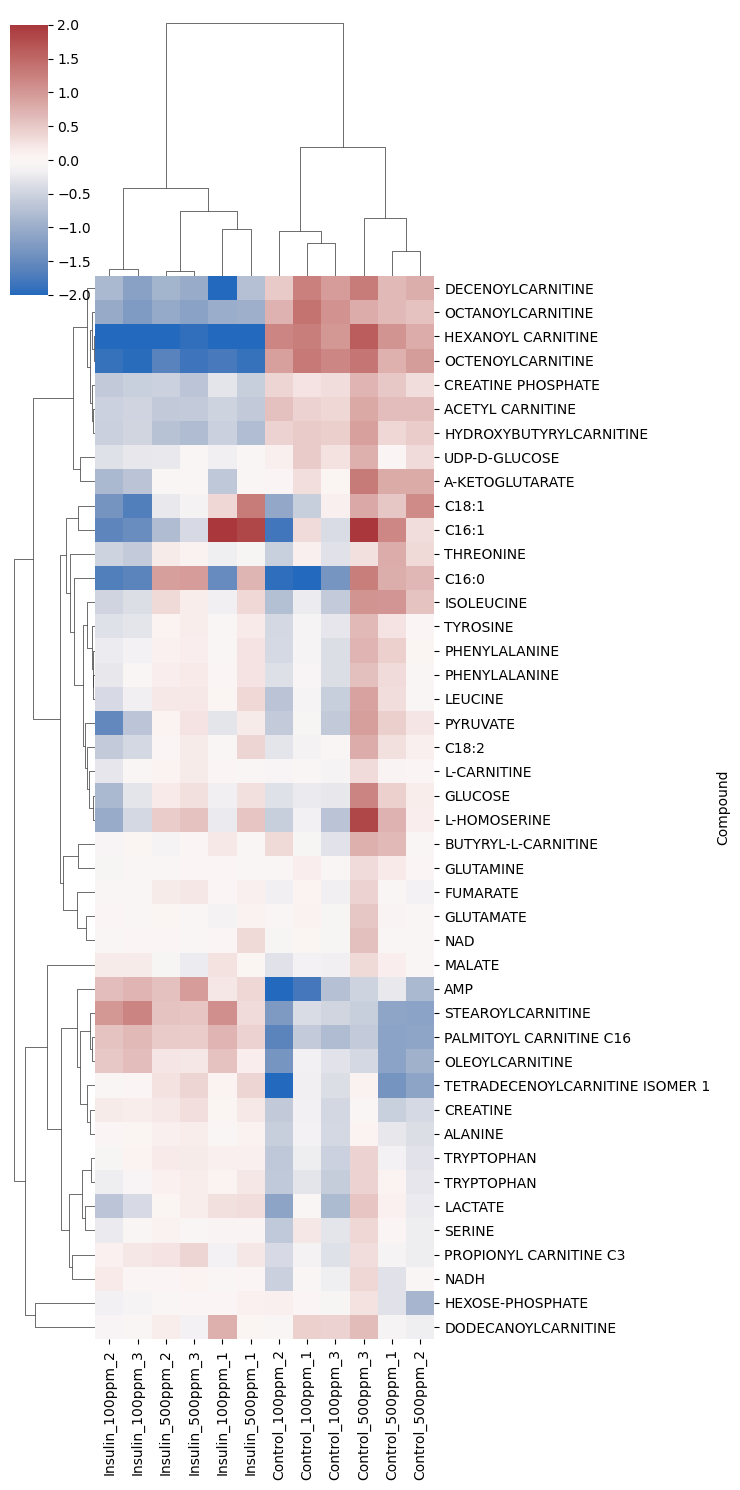

In [44]:
# Plot log2 transformed data
import numpy as np 

# Rotate colorbar by 90deg to make it more readable
sns.clustermap(np.log2(df_soleus).dropna(), cmap="vlag", figsize=(7.5, 15), center=0, vmin=-2, vmax=2, metric="cosine")

#cbar_kws={"orientation": "horizontal",}
plt.show()
